In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme()

In [58]:
import os

PLOT_DIR = "example-plots"

if not(os.path.exists(PLOT_DIR)):
    os.mkdir(PLOT_DIR)

In [59]:
# Load data
# results_file = "result-1625148829-all.csv"
# results_file = "result-1624554975-all-exec.csv"
results_file = "20210909-Hanoi-all.csv"
df_raw = pd.read_csv(f"results/{results_file}")

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Benchmark                 72 non-null     object 
 1   Mode                      72 non-null     object 
 2   Threads                   72 non-null     int64  
 3   Samples                   72 non-null     int64  
 4   Score                     72 non-null     float64
 5   Score Error (99.9%)       0 non-null      float64
 6   Unit                      72 non-null     object 
 7   Param: metaborgVersion    72 non-null     object 
 8   Param: optimisationLevel  72 non-null     int64  
 9   Param: problemSize        72 non-null     int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 5.8+ KB


In [60]:
for col in ["Score", "Score Error (99.9%)"]:
    if df_raw[col].dtype == object:
        df_raw[col] = df_raw[col].map(lambda s: s.replace(',', '.'), na_action="ignore").astype(float)

# df_raw

In [61]:
df_raw["Param: optimisationLevel"] = df_raw["Param: optimisationLevel"].astype("string")

In [62]:
df = df_raw[df_raw.Benchmark.str.endswith("jfr") == False].copy()

In [63]:
df["Stage"] = df["Benchmark"].str.rpartition('.')[2]
df["Problem"] = df["Benchmark"].str.split('.', expand=True).iloc[:, -2]

# df.head()

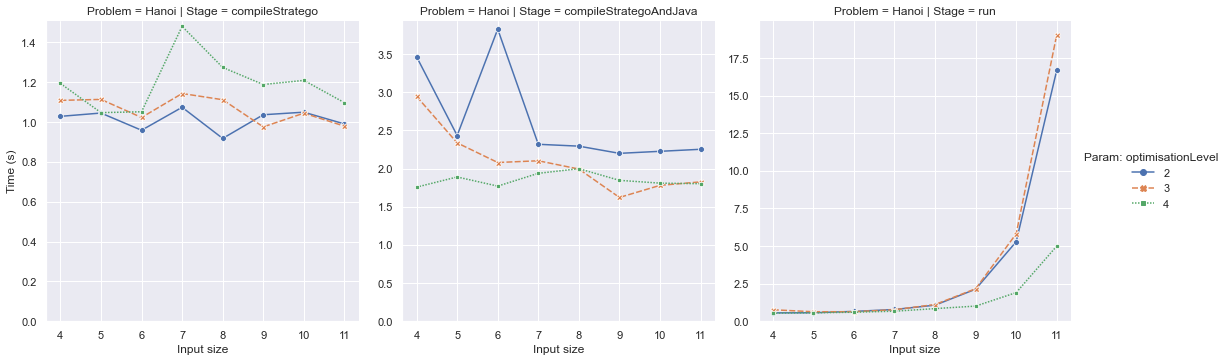

In [64]:
df_scaledproblem = df[df["Param: problemSize"] != -1]

g = sns.relplot(
    data=df_scaledproblem,
    x="Param: problemSize",
    y="Score",
    row="Problem",
    col="Stage",
#     col_order=["compileStratego", "compileJava", "run"],
    style="Param: optimisationLevel",
    hue="Param: optimisationLevel",
    hue_order=["2", "3", "4"],
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
)

# TODO Include strj runtime -> with and without fusion

# plt.yscale("log")
g.set_ylabels("Time (s)")
g.set_xlabels("Input size")
g.set(ylim=(0, None))

plt.savefig(f"example-plots/{results_file}-scaled.png", transparent=False)

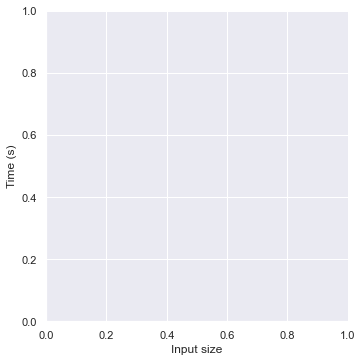

In [65]:
df_unscaledproblem = df[df["Param: problemSize"] == -1]

g = sns.relplot(
    data=df_unscaledproblem,
    y="Score",
    row="Problem",
    col="Stage",
#     col_order=["compileStratego", "compileJava", "run"],
    style="Param: optimisationLevel",
    hue="Param: optimisationLevel",
    kind="scatter",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
)

# TODO Include strj runtime -> with and without fusion

# plt.yscale("log")
g.set_ylabels("Time (s)")
g.set_xlabels("Input size")
g.set(ylim=(0, None))

plt.savefig(f"example-plots/{results_file}-unscaled.png", transparent=False)